In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Download the Mall Customer Segmentation Dataset from the new URL
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"

# Load the dataset
df = pd.read_csv(url)
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


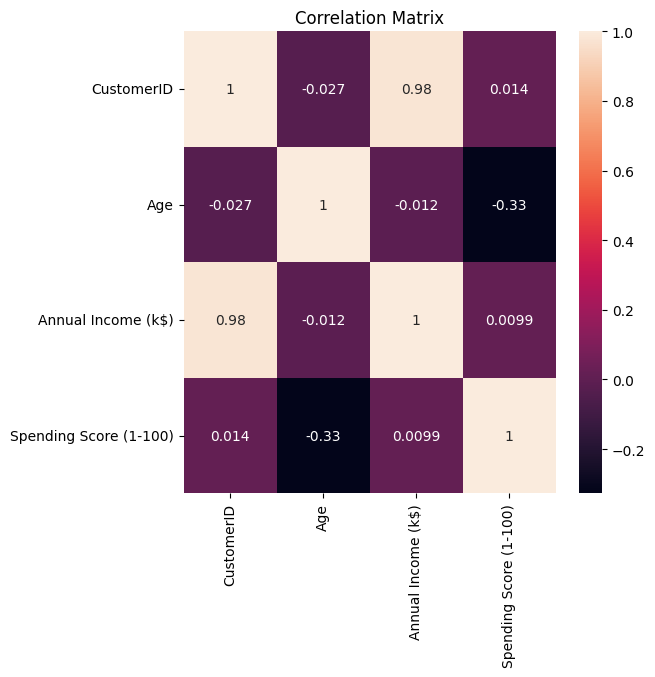

In [5]:
# Assuming df is your DataFrame
correlation_matrix = df.corr(numeric_only=True)
# Set up the matplotlib figure
plt.figure(figsize=(6, 6))
#annot=True adds the correlation values to each cell
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

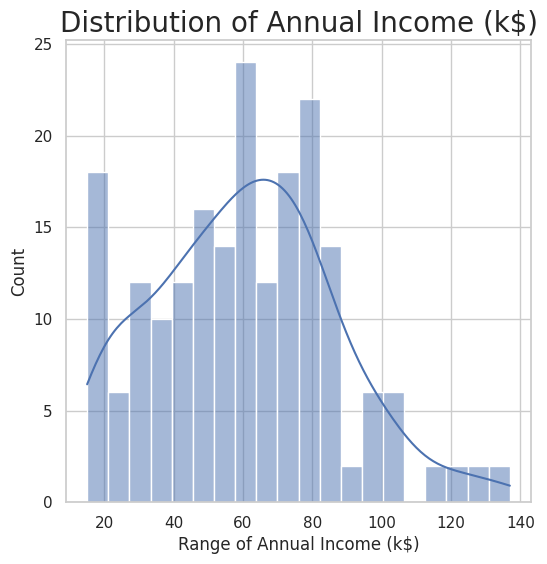

In [7]:
# Distribution of Annual Income
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

In [8]:
#We take just the Annual Income and Spending score
X=df[["Annual Income (k$)","Spending Score (1-100)"]]
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


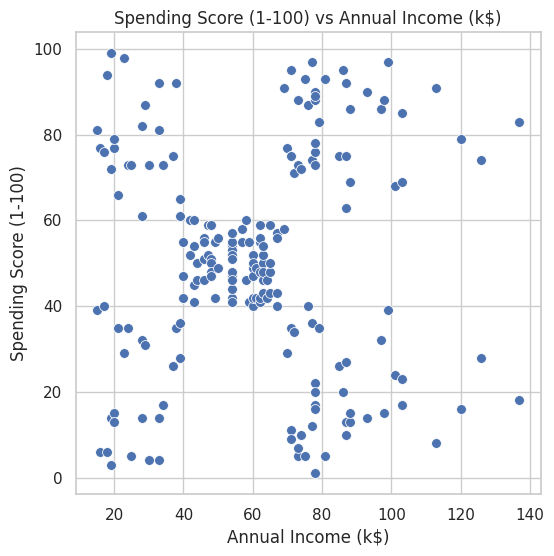

In [10]:
#Scatterplot of the input data
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 50 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans
# Find the optimal number of clusters using the Elbow Method
#SSE - WCSS - Within Cluster Sum of Errors
wcss = []
for i in range(1, 11): #1 to 10
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

In [18]:
wcss

[400.00000000000006,
 269.01679374906655,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.91118554999014,
 37.181757826821325,
 32.375253681582876,
 29.076176851244277]

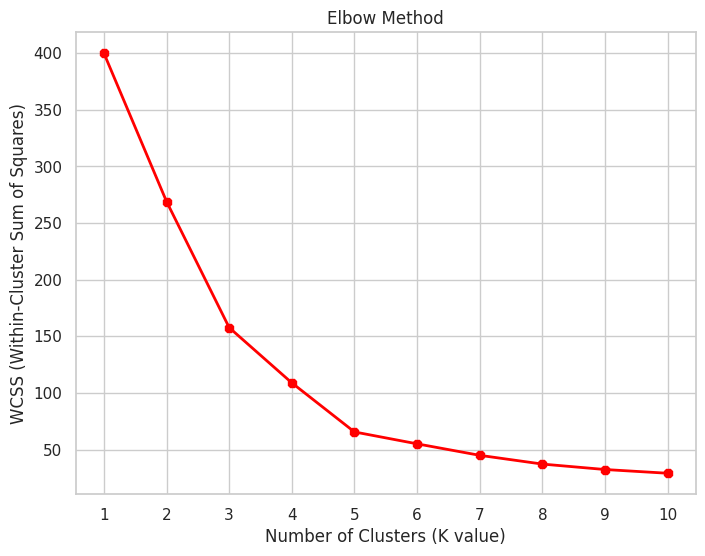

In [27]:
#The elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K value)')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [36]:
df1 = df
#Taking 5 clusters
kmeans=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
#Fitting the input data
kmeans.fit(X)
#predicting the labels of the input data
cluster_labels=kmeans.predict(X)
#adding the labels to a column named label
df1["Cluster"] = cluster_labels
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [39]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [38]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

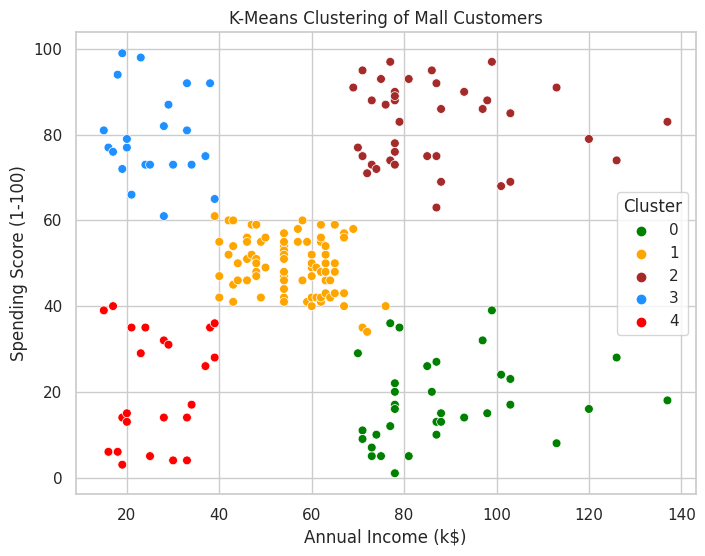

In [40]:
#Scatterplot of the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue="Cluster",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 40 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.show()